# Analyzing A Network of Synaptic Interactions [100 Points]

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import numpy as np
import scipy as sp

## Part I

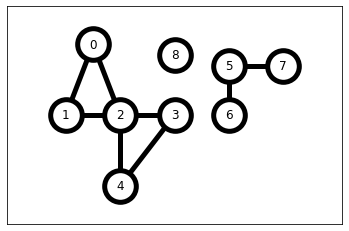

In [4]:
#Part I-1
#Implement your code and show the visualization
G = nx.Graph()
G.add_edge(0, 1)
G.add_edge(0, 2)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(2, 4)
G.add_edge(3, 4)

G.add_edge(5, 6)
G.add_edge(5, 7)

G.add_node(8)

# explicitly set positions
pos = {0: (0.5,2), 1: (0, 1), 2: (1, 1), 3: (2, 1), 4: (1, 0), 5: (3, 1.7), 6: (3, 1), 7: (4, 1.7), 8: (2, 1.85)}

options = {
    "font_size": 12,
    "node_size": 1000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
nx.draw_networkx(G, pos, **options, with_labels=True)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
#plt.axis("off")
plt.show()

In [5]:
#Part I-2.a
#Implement your code and write the answer in the Markdown cell right below
G = nx.read_graphml('Assignment1_Part1-2_cities_data.graphml')
print("number of nodes is", G.number_of_nodes())
print("number of edges is", G.number_of_edges())

count=0
for (a, b, wt) in G.edges.data('weight'):
    if wt < 50:
        count+=1 
print("number of weight between them less than 50 is", count)

number of nodes is 128
number of edges is 8128
number of weight between them less than 50 is 8


Type your answer for Part I-2.a here
_______________________________________________________________________________

number of nodes: 128
number of edges: 8128
number of the pairs : 8 

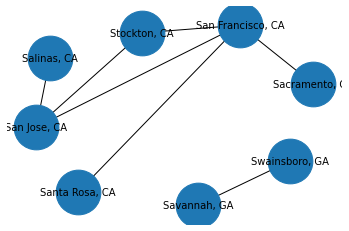

In [6]:
#Part I-2.b
#Implement your code and show the visualization of Question 4
def cities_within_100(G, city_list):
    sg = nx.Graph()
    edges = [(u,v,d) for u,v,d in G.edges(data=True) if ((u in city_list or v in city_list)) and d['weight'] < 100]
    sg.add_edges_from(edges)
    return sg
'''
Input
G: graph
city_list: list of strings (names of cities in G)

Output
S: subgraph of G that only contains edges between cities in “city_list” and directly neighboring cities that are less than 100 miles away
'''
city_list = ["Savannah, GA", "Santa Rosa, CA", "San Francisco, CA", "San Jose, CA"]
SG = cities_within_100(G, city_list)
pos = nx.spring_layout(SG, k=20)
nx.draw_networkx_labels(SG, pos, font_color ='black',font_size=10)
nx.draw(SG, pos = pos, node_size=2000)

In [8]:
#Part I-3
#Implement your code and write the answer in the Markdown cell right below
from numpy.linalg import eig

# cycle graph
# cycle graph
G1 = nx.cycle_graph(10)
L1 = nx.adjacency_matrix(G1)
u,v = eig(L1.toarray())
print('****Cycle Graph****')
print("Largest eigenvalue:", max(np.abs(u)))
print("Smallest eigenvalue:", min(np.abs(u)))
degrees = [k for node, k in nx.degree(G1)]

print ('Minimum degree: ', np.min(degrees))
print ('Maximum degree: ', np.max(degrees))
print ('Average degree: ', np.mean(degrees))

# illustrate graph
#nx.draw(G, node_size=150, node_color='green')

G2 = nx.complete_graph(10)
L2 = nx.adjacency_matrix(G2)
u,v = eig(L2.toarray())
print('****Compelete Graph****')
print("Largest eigenvalue:", max(np.abs(u)))
print("Smallest eigenvalue:", min(np.abs(u)))
degrees = [k for node, k in nx.degree(G2)]

print ('Minimum degree: ', np.min(degrees))
print ('Maximum degree: ', np.max(degrees))
print ('Average degree: ', np.mean(degrees))
# illustrate graph
#nx.draw(G, node_color = 'green', node_size = 1500)


G3 = nx.star_graph(10)
L3 = nx.adjacency_matrix(G3)
u,v = eig(L3.toarray())
print('****Star Graph****')
print("Largest eigenvalue:", max(np.abs(u)))
print("Smallest eigenvalue:", min(np.abs(u)))
degrees = [k for node, k in nx.degree(G3)]

print ('Minimum degree: ', np.min(degrees))
print ('Maximum degree: ', np.max(degrees))
print ('Average degree: ', np.mean(degrees))
# illustrate graph
#nx.draw(G, node_color = 'green',node_size = 1500)


****Cycle Graph****
Largest eigenvalue: 2.000000000000001
Smallest eigenvalue: 0.6180339887498943
Minimum degree:  2
Maximum degree:  2
Average degree:  2.0
****Compelete Graph****
Largest eigenvalue: 8.999999999999998
Smallest eigenvalue: 0.9999999999999996
Minimum degree:  9
Maximum degree:  9
Average degree:  9.0
****Star Graph****
Largest eigenvalue: 3.1622776601683804
Smallest eigenvalue: 0.0
Minimum degree:  1
Maximum degree:  10
Average degree:  1.8181818181818181


The largest eigenvalues in cycle, complete and star graph are 2.0, 9.0 and 3.2. Therefore, complete graph has the largest, followed by star, and then cycle graph.

In general, Average degree <= Largest eigenvalue <= Maximum degree based on the results above

## PART II

In [22]:
#Part II-1
#Implement your code here and write the answer in the Markdown cell right below
G = nx.read_gml('Assignment1_Part2_lesmis_data.gml')
nx.is_connected(G)

True

Connected.

Text(0, 0.5, 'count')

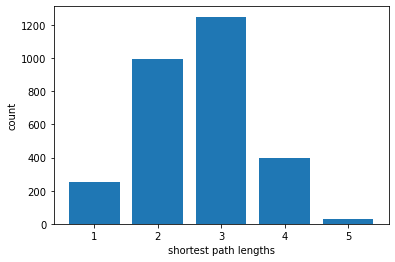

In [23]:
#Part II-2
#Implement your code and plot your distribution
short_paths_arr = []
start_nodes = []
for i, j in list(nx.all_pairs_shortest_path_length(G)):
    for m,v in j.items():
        if m not in start_nodes:# cannot count twice
            start_nodes.append(i)
            short_paths_arr.append(v)
short_paths_arr = [x for x in short_paths_arr if x != 0]
idx = sorted(set(short_paths_arr))
count = []
for i in idx:
    count.append(short_paths_arr.count(i))
plt.bar(idx, count)
#for i in idx
#plt.bar(np.array(short_paths_arr),bins=5)
plt.xlabel('shortest path lengths')
plt.ylabel('count')
#max(short_paths_arr)
#set(short_paths_arr)

In [24]:
#Part II-3
#Implement your code here and write the answer in the Markdown cell right below
# calculate sum of weights based on node
node_ls = sorted(list(G.nodes())) # sorted
node_dict = dict(zip(node_ls, [0]*len(node_ls)))
for node1, node2, weight in G.edges.data('value'): # only count once
    if (node1 in node_dict):
        node_dict[node1] +=weight
    if (node2 in node_dict):
        node_dict[node2] +=weight

# build transition matrix
P = np.zeros((len(node_ls), len(node_ls)))

for node1, node2, weight in G.edges.data('value'):
    id1 = node_ls.index(node1)
    id2 = node_ls.index(node2)
    P[id1, id2] = weight/node_dict[node1]
    P[id2, id1] = weight/node_dict[node2]

# assume equal probability of starting point
q = np.ones(len(node_ls))/len(node_ls)

# calculate the final equalibrium
temp_q = q
for i in range(1000):
    q_final = np.dot(P.T, temp_q)
    temp_q = q_final.copy()

ind = np.argmax(q_final)
print('first is', node_ls[ind])

q_final[ind] = -9999
ind = np.argmax(q_final)
print('second is', node_ls[ind])

q_final[ind] = -9999
ind = np.argmax(q_final)
print('third is', node_ls[ind])


first is Valjean
second is Marius
third is Enjolras


The Top three characters are Valjean, Marius and Enjolras

## Part III

In [17]:
#Load the graph
G = nx.read_graphml('Assignment1_Part3_drosophila_medulla_data.graphml')

In [18]:
#Part III-1
#Implement your code and write the answer in the Markdown cell right below
m = 0
for i in range(len(list(nx.weakly_connected_components(G)))):
    if len(list(nx.weakly_connected_components(G))[i]) > m:
        m = len(list(nx.weakly_connected_components(G))[i])

answer = m/len(G.nodes)
answer


0.9938236945536215

99.38%

In [19]:
#Part III-2
#Implement your code and write the answer in the Markdown cell right below
m = 0
for i in range(len(list(nx.strongly_connected_components(G)))):
    if len(list(nx.strongly_connected_components(G))[i]) > m:
        m = len(list(nx.strongly_connected_components(G))[i])

answer = m/len(G.nodes)
answer

0.4407636159460977

44.07%
_______________________________________________________________________________


Text(0, 0.5, 'count')

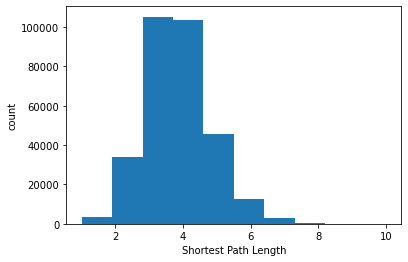

In [20]:
#Part III-3
#Implement your code and show the distribution
# get the largest strongly compnents
#import multiprocessing
#pool_obj = multiprocessing.Pool(4)

for ls in list(nx.strongly_connected_components(G)):
    if len(ls) == m:
        break
ls_graph = nx.subgraph(G, ls)
ls = list(ls)

path_len = [dist for n, (dist, path) in nx.all_pairs_dijkstra(ls_graph)]

ll = []
for i in path_len:
    ll.extend(list(i.values()))

# length count twice
path_no = list(set(ll))
path_no.remove(0)
new_ll = []
for i in path_no:
    new_ll.extend([i] * int(ll.count(i)/2))


plt.hist(new_ll)
plt.xlabel('Shortest Path Length')
plt.ylabel('count')

## PART IV

In [29]:
#Part IV-1
# Ref: https://www.youtube.com/watch?v=iRxMVcwaKe0
import pandas as pd 
data = pd.read_csv('Assignment1_Part4_github_data.txt', delimiter=" ",header=None, names=['ID','Project','Undef'])
data = data[['ID','Project']]
# very
data['ID'] = 'U' + data['ID'].astype(str)
data['Project'] = 'P' + data['Project'].astype(str)
G = nx.Graph()
edges = [tuple(x) for x in data[['ID','Project']].values.tolist()]
G.add_nodes_from(data['ID'].unique(), bipartite=0, label='user')
G.add_nodes_from(data['Project'].unique(), bipartite=1, label='pro')
G.add_edges_from(edges, label='w')
#for row in edges:
#    G.add_edge(row[0], row[1])
from networkx.algorithms.bipartite import biadjacency_matrix 
a=biadjacency_matrix(G,row_order=data['ID'].unique(),column_order=data['Project'].unique())

# one-node projection
# ID
ID = np.dot(a, a.T)
# Project
Project = np.dot(a.T,a)

655 and 325
_______________________________________________________________________________
People with most number of shared memberships:

In [33]:
#Part IV-2 (Continue)
#Implement your code and write the answer in the Markdown cell right below
#set diagnol element to be 0
Project.setdiag(0)
ID.setdiag(0)
ID_nodes = {i for i, j in G.nodes(data=True) if j['bipartite']==0}
Project_nodes = {i for i, j in G.nodes(data=True) if j['bipartite']==1}

from scipy.sparse import csc_matrix
ix = ID.argmax()
row = int((ix+1)/ID.shape[1])
col = np.mod(ix, ID.shape[1])

print('Share most Github are', list(data['ID'].unique())[row], 'and ', list(data['ID'].unique())[col])


ix = Project.argmax()
row = int((ix+1)/Project.shape[1])
col = np.mod(ix, Project.shape[1])

print('Share most Project are', list(data['Project'].unique())[row], 'and ', list(data['Project'].unique())[col])

#ID = ID.toarray()
#idx1, idx2 = np.argmin(ID)
#idx1

Share most Github are U655 and  U325
Share most Project are P299 and  P17


299 and 17
_______________________________________________________________________________

Projects with most number of shared users:

## PART V

In [2]:
#Part V-1
#Implement your code and write the answer in the Markdown cell right below
import pandas as pd
data = pd.read_csv('Assignment1_Part5_language_data.txt', delimiter="\t",header=None, names=['LangA','LangB'])
G = nx.DiGraph()
edges = [tuple(x) for x in data[['LangA','LangB']].values.tolist()]
G.add_nodes_from(data['LangA'].unique(), bipartite=0, label='A')
G.add_nodes_from(data['LangB'].unique(), bipartite=1, label='B')
G.add_edges_from(edges, label='w')
nx.is_directed_acyclic_graph(G)

False

Not a DAG

In [3]:
#Part V-2
#Implement your code 
cycle_list = list(nx.simple_cycles(G))
cycle_alpha =[]
for u, v in cycle_list:
    if u<v:
        cycle_alpha.append(tuple([u,v]))
    else:
        cycle_alpha.append(tuple([v,u]))

edges = [elem for elem in edges if elem not in cycle_alpha]

G = nx.DiGraph()
G.add_nodes_from(data['LangA'].unique(), bipartite=0, label='A')
G.add_nodes_from(data['LangB'].unique(), bipartite=1, label='B')
G.add_edges_from(edges, label='w')
nx.is_directed_acyclic_graph(G)

True

In [17]:
S = [G.subgraph(c).copy() for c in nx.weakly_connected_components(G)]
#ls = [nx.topological_sort(H) for H in S]
#ls
ls = [list(nx.topological_sort(H)) for H in S]

for i in range(len(ls)):
    print("source language is", ls[i][-1]) # reverse the list
    print("direct len is", len(ls[i]))



source language is speedcoding
direct len is 339
source language is general_algebraic_modeling_system
direct len is 2
source language is yacc
direct len is 4
source language is 400_control_language/pl/i
direct len is 3
source language is inform_sis
direct len is 2
source language is metafont
direct len is 2
source language is sql/pascal
direct len is 8
source language is k/pl/i
direct len is 2


8 Source languages: speedcoding, general_algebraic_modeling_system, yacc, 400_control_language/pl/i, inform_sis, metafont, sql/pascal and k/pl/i
Direct highest influence is: speedcoding

_______________________________________________________________________________
